In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os
#import codecs

# set the path to find the modules
sys.path.insert(0, "/storage/remote/atcremers50/ss21_multiagentcontrol/005_src/") 
os.chdir("/storage/remote/atcremers50/ss21_multiagentcontrol/005_src/")

from config import *
from _03_Networks.GCN_017.GCN_model_017 import *
from _03_Networks.GCN_017.GCN_trainer_017 import *
from _03_Networks.GCN_017.GCN_parameters_017 import *
from _03_Networks.GCN_017.Custom_losses import *
this_GCN, ts_import = check_import()

this_date = get_date()
print(f"starting: {this_date}-{ts_import}")
print ("-"*40)

device = cudaOverview()
print ("-"*40)

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

at 14h55m47s imported models:

In [2]:
#--------------------------------
## FULL PRINTING
#--------------------------------
printstat = False


#--------------------------------
## WARNINGS MUTED
#--------------------------------
pd.options.mode.chained_assignment = None
plt.rcParams.update({'figure.max_open_warning': 0})


In [56]:
##--------------------------------
# PARAMETERS HARDCODED
##--------------------------------
### old inputs with intention right, left, u turn
#input_file_name = "20210710-20h38m27s_timesteps14930_ec3500_em7000" #15000
#input_file_name = "20210711-17h59m44s_timesteps30000_ec3500_em7000" #30000
#input_file_name = "20210710-11h46m35s_timesteps200_ec3500_em7000"

### new inputs with intention N,S,E,W,C
#input_file_name = "20210724-19h49m31s_timesteps150000_ec3500_em7000"
#input_file_name = "20210725-16h24m21s_timesteps200_ec3500_em7000"

## ONLY moving vehicles, set parse_data_stat to False, since this data is already parsed
input_file_name = "df_only_moving_vehicles"


parse_data_stat = False

random_seed = 42
train_size = 0.9  
Nepochs = 5000  
save_every = int(Nepochs/20) # temp pkl, pt, png, can delete after final is stored

# plot every can be an integer or a list of frames
plot_every = int(Nepochs/20) 
#plot_every = flatten([list(range(0,101,10)),
                            #list(range(100,1001,100)),
                            #list(range(1000,5001,1000)),
                            #list(range(10000,100001,10000))
                            #])
savestat = True
transformstat = False
plotstat = True
run_unattended = True
final_print = False

if Nepochs <1000:
    savestat = False
    plotstat = False
            
input_columns = [
                        'data_pos_zc',  #x,y, size 2
                        'data_x_rad',#  yaw in rad, speed, intention size 3
                        'Still_vehicle', # is the vehicle moving or not (similar to traffi light info), size 1
                        ]
    
output_columns = [
                        'data_y_zc',
                        'data_y_yaw' 
                        ]
shuttle_train = None # if none is set manually an appropriate one will be randomly chosen
shuttle_val = None

# OPTIONS
reduction_options = [
                         #'mean', 
                         'sum', 
                         'none' 
                        ]
batch_sizes = [
                   #1,
                   #16,
                   #32,
                   #64,
                   #128,
                   #256,
                   512,
                   #1024
                  ]
    
optimizers = [
                  #"Adadelta",
                  #"Adagrad",
                  "Adam",
                  #"AdamW",
                  #"SparseAdam",
                  #"Adamax",
                  #"ASGD",
                  #"LBFGS",
                  #"RMSprop",
                  #"Rprop",
                  #"SGD"
                 ]
    
criterion = [
                #"MSE",
                 "L1",
                 #"L1_mean_handmade"
                ]
    
hl_sizes = [
                #[64],
                #[64,128],
                #[64,128,256],
                [128,256,64]
                ]
    
lr_sizes = [
                0.001,
                #0.01,
                #0.0001
                ]
    
momentum_sizes = [
                     # 0.1,
                      0.6,
                     # 0.9
                    ]
    
weight_decays = [
                     0,
                     #1e-4
                    ]
    
# https://pytorch.org/docs/stable/optim.html
lr_schedulers = [
                    #"ReduceLROnPlateau",
                    "CosineAnnealingWarmRestarts",
                    "None",
                    #"MultiStepLR",
                    ]
    
use_edges_attributes = [
                        False,
                        True,
                            ]
activation_functions = [
                            "relu",
                            #"tanh",
                            "leaky_relu",
                            #"rrelu",
                            ]

In [57]:
TRAIN_PARAMS_FOLDER

'/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/combo_training_parameters/'

In [58]:
##================================================
# CREATE COMBINATIONS
##================================================

list_parameters_space = [
                             reduction_options,
                             batch_sizes,
                             
                             optimizers,
                             criterion,
                             
                             hl_sizes,
                             lr_sizes,
                             
                             momentum_sizes,
                             weight_decays, 
                             lr_schedulers,
        
                             use_edges_attributes,
                             activation_functions
        
    ]
    


all_combo = list(itertools.product(*list_parameters_space))
print (*[f"{i}){e}" for i,e in enumerate(all_combo)], sep = "\n")

0)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', False, 'relu')
1)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', False, 'leaky_relu')
2)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', True, 'relu')
3)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', True, 'leaky_relu')
4)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'None', False, 'relu')
5)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'None', False, 'leaky_relu')
6)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'None', True, 'relu')
7)('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'None', True, 'leaky_relu')
8)('none', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', False, 'relu')
9)('none', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', False, 'leaky_relu')
10)(

In [59]:

# save the list
#all_combo_path = os.path.join(TRAIN_PARAMS_FOLDER,f'{this_date}_all_combos_params'+'.pkl')
#with open(all_combo_path, 'wb') as f:
    #pkl.dump(all_combo, f)
    
    
print(f"> TRAINING OVER {len(all_combo)} COMBINATIONS")
if run_unattended == False and len(all_combo)> 1:
        print ("Given that multiple combinations are going to be computed")
        print ("temporaly files will be automatically deleted at the end of each training without need of any intervention")
        run_unattended = True


> TRAINING OVER 16 COMBINATIONS


In [60]:
tried_combo_path = os.path.join(TRAIN_PARAMS_FOLDER,f'001_tried_combos_params'+'.pkl')
    
if os.path.exists(tried_combo_path):
    tried_combos = pkl.load(open(tried_combo_path, 'rb'))
else:
    tried_combos = []
tried_combos

[('sum',
  1,
  'Adam',
  'L1',
  [128, 256, 64],
  0.001,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  False,
  'relu')]

In [61]:
all_combo[0]

('sum',
 512,
 'Adam',
 'L1',
 [128, 256, 64],
 0.001,
 0.6,
 0,
 'CosineAnnealingWarmRestarts',
 False,
 'relu')

In [62]:

    
tried_combos = []
i = 0
combo = all_combo[i]
ts = get_timestamp()
        
print (f"\nCOMBINATION {pad(i,minl = 4)}")
print (combo)
print ("")
        
if not combo in tried_combos:
            ##--------------------------------
            # PARAMETERS FROM COMBINATIONS
            ##--------------------------------       
            
            reduction = combo[0]
            batch_size = combo[1]

            select_optimizer = combo[2]
            select_criterion = combo[3]

            hidden_layers_sizes = combo[4]
            lr = combo[5]
            momentum = combo[6]
            weight_decay=combo[7]
            select_scheduler= combo[8]
            use_edges_attr= combo[9]
            activation_fun = combo[10]
            
            tried_combos.append(combo)
            with open(tried_combo_path, 'wb') as f:
                pkl.dump(tried_combos, f)
else:
            print (f"{combo} already trained")


COMBINATION 0000
('sum', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', False, 'relu')



In [63]:
##================================
## INIT SAVING PATHS
##================================

MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)
if not os.path.exists(MODEL_OUTPUT_PATH_TODAY):
        Path(MODEL_OUTPUT_PATH_TODAY).mkdir(parents=True, exist_ok=True)
    
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
print (MODEL_OUTPUT_PATH_DATASETS)
if not os.path.exists(MODEL_OUTPUT_PATH_DATASETS):
        Path(MODEL_OUTPUT_PATH_DATASETS).mkdir(parents=True, exist_ok=True)

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210729-15h18m11s/
/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/


In [64]:
##================================
## LOAD DATA
##================================
dict_text_output = {}
dict_text_output = update_dict_with_key("input_file_name",input_file_name, dict_text_output)
dict_text_output

{'input_file_name': 'df_only_moving_vehicles'}

In [65]:
if parse_data_stat: 
    print (f"\n> SELECTING INPUT ROWS")
    df_all,df_selected = select_rows_from_data(input_file_name,drop_col = True)
    print (f"\n> CORRECTING COLUMNS DATA_POS, DATA_Y_POS, DATA_Y_YAW")
    df_selected = adjust_columns(df_selected)

    # for now we take only the coherent rows
    df_input = adjust_columns(df_selected)
    printif(f"selected {len(df_input)} coherent rows over {len(df_all)} total",printstat)
else:
    # row data
    file_to_read = open(f"../004_data/GCN_input/{input_file_name}.pkl", "rb")
    df_input = pkl.load(file_to_read)

In [66]:

df_input

,index,data_x,data_pos,data_edges,data_edges_renamed,data_y,data_edges_attr,training_row,data_pos_zc,Still_vehicle,data_y_zc,data_y_yaw,data_x_rad,data_y_delta,all_veh_moving,num_veh_tot,num_veh_moving,num_veh_still
0,5,"[[180.0, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[98.4, 183.38], [101.6, 5.1]]","[[0], [1]]","[[0], [1]]","[[98.4, 165.1, 180.0], [101.6, 11.5, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 83.38], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 65.1], [1.5999999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 6.25, 1.0], [0.0, 0.0, 1.0]]","[[0.0, -18.28], [0.0, 6.400000000000006]]",True,2,2,0
1,6,"[[180.0, 8.46, 1.0], [0.0, 1.96, 1.0]]","[[98.4, 174.92], [101.6, 7.06]]","[[0], [1]]","[[0], [1]]","[[98.4, 152.94, 180.0], [101.6, 17.33, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 74.91999999999999], [1....","[[False], [False]]","[[-1.5999999999999943, 52.94], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 8.46, 1.0], [0.0, 1.96, 1...","[[0.0, -21.97999999999999], [0.0, 10.269999999...",True,2,2,0
2,7,"[[180.0, 9.82, 1.0], [0.0, 4.44, 1.0]]","[[98.4, 165.1], [101.6, 11.5]]","[[0], [1]]","[[0], [1]]","[[98.4, 139.08, 180.0], [101.6, 25.54, 0.0]]",[1.4000000000000001],True,"[[-1.5999999999999943, 65.1], [1.5999999999999...","[[False], [False]]","[[-1.5999999999999943, 39.08000000000001], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 9.82, 1.0], [0.0, 4.44, 1...","[[0.0, -26.019999999999982], [0.0, 14.03999999...",True,2,2,0
3,8,"[[180.0, 12.16, 1.0], [0.0, 5.83, 1.0]]","[[98.4, 152.94], [101.6, 17.33]]","[[0], [1]]","[[0], [1]]","[[98.4, 123.22, 180.0], [101.6, 35.19, 0.0]]",[1.6],True,"[[-1.5999999999999943, 52.94], [1.599999999999...","[[False], [False]]","[[-1.5999999999999943, 23.22], [1.599999999999...","[[3.141592653589793], [0.0]]","[[3.141592653589793, 12.16, 1.0], [0.0, 5.83, ...","[[0.0, -29.72], [0.0, 17.86]]",True,2,2,0
4,9,"[[180.0, 13.86, 1.0], [0.0, 8.21, 1.0]]","[[98.4, 139.08], [101.6, 25.54]]","[[0], [1]]","[[0], [1]]","[[98.4, 105.61, 180.0], [101.6, 46.24, 0.0]]",[1.7000000000000002],True,"[[-1.5999999999999943, 39.08000000000001], [1....","[[False], [False]]","[[-1.5999999999999943, 5.609999999999999], [1....","[[3.141592653589793], [0.0]]","[[3.141592653589793, 13.86, 1.0], [0.0, 8.21, ...","[[0.0, -33.47000000000001], [0.0, 20.700000000...",True,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10155,159,"[[0.0, 8.35, 0.0], [273.43, 5.73, 0.0], [270.0...","[[101.6, 118.12], [105.11, 101.9], [118.78, 10...","[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]...","[[101.6, 141.5, 0.0], [101.6, 110.7, 357.56], ...","[9.0, 5.4, 2.9, 1.7999999999999998, 8.5, 8.0, ...",True,"[[1.5999999999999943, 18.120000000000005], [5....","[[False], [False], [False], [False], [False], ...","[[1.5999999999999943, 41.5], [1.59999999999999...","[[0.0], [6.240599273430925], [4.71238898038469...","[[0.0, 8.35, 0.0], [4.772253773728095, 5.73, 0...","[[0.0, 23.379999999999995], [-3.51000000000000...",True,6,6,0
10156,160,"[[0.0, 10.66, 0.0], [325.01, 5.68, 0.0], [270....","[[101.6, 128.78], [101.78, 105.97], [113.98, 1...","[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5]...","[[101.6, 155.53, 0.0], [101.6, 117.14, 0.0], [...","[11.0, 5.7, 4.3, 2.0999999999999996, 5.7, 7.5,...",True,"[[1.5999999999999943, 28.78], [1.7800000000000...","[[False], [False], [False], [False], [False], ...","[[1.5999999999999943, 55.53], [1.5999999999999...","[[0.0], [0.0], [4.97715542791223], [4.71238898...","[[0.0, 10.66, 0.0], [5.67249460190677, 5.68, 0...","[[0.0, 26.75], [-0.18000000000000682, 11.17000...",True,6,6,0
10157,161,"[[0.0, 12.72, 0.0], [357.56, 4.74, 0.0], [270....","[[101.6, 141.5], [101.6, 110.7], [108.31, 101....","[[12, 12, 12, 12, 12, 13, 13, 13, 13, 15, 15, ...","[[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4,

In [67]:
## add information to the dict
try: 
    txt_data = os.path.join(GCN_INPUT_FOLDER,f"{input_file_name}.txt")
    dict_text_data = read_txt_data(txt_data)
    M = int(dict_text_data['max_num_veh'])
    sim_duration_timesteps = dict_text_data['sim_duration_timesteps']

    printif(f"max_num_veh: {M}",printstat)
    printif(f"sim_duration_timesteps: {sim_duration_timesteps}",printstat)
    dict_text_output['max_num_veh'] = M
    dict_text_output['sim_duration_timesteps'] = sim_duration_timesteps
    dict_text_output
except Exception as e: 
    dict_text_output['max_num_veh'] = 10
    dict_text_output['sim_duration_timesteps'] = len(df_input)

In [68]:
##================================
## TRAIN VAR
##================================
training_losses = []
validation_losses = []
lr_rates = []
    
## update 
dict_updates = {
                    'train_size':train_size,
                    'batch_size': batch_size,
                    'Nepochs': Nepochs,
                        }
dict_text_output = update_dict_many_keys(dict_updates, dict_text_output)
    
## add information to the dict
dict_text_output.update({
                        'run_date': this_date,
                        'run_time':ts,
                        'model': this_GCN,
                        'combo': combo, 
                        'random_seed': random_seed,
                        #'train_size':train_size,
                        #'batch_size': batch_size,
                        #'Nepochs': Nepochs,
                        'save_every':save_every, 
                        'transformstat': transformstat,
                        'plotstat': plotstat,
                        'printstat' : printstat,
                        'intentionstat':"obsoleted",
                        'use_edges_attr':use_edges_attr,
                        'activation_function': activation_fun,
                        })
    

    
dict_text_output['shuttle_train_frame'] = shuttle_train
dict_text_output['shuttle_val_frame'] = shuttle_val
    

In [69]:
MODEL_OUTPUT_PATH_DATASETS

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/'

In [70]:
f'{input_file_name}_{int(train_size*len(df_input))}'+f'_IN{list2string(input_columns)}OUT{list2string(output_columns)}_dataset*'

'df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset*'

In [71]:
##=============================== 
## CREATING THE DATASET
##================================
# search for pre-existing datasets
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"
                                     +"/**/*"
                                     + f'{input_file_name}_{int(train_size*len(df_input))}'
                                     +f'_IN{list2string(input_columns)}OUT{list2string(output_columns)}_dataset*',
                                     recursive=True))

In [72]:
print (len(datasets_list))
datasets_list

5


['/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_01_train.pt',
 '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_02_validation.pt',
 '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_03_test.pt',
 '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_data_y_yaw__dataset_04_shuttle_train.pt',
 '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/DATASETS/df_only_moving_vehicles_9144_IN_data_pos_zc_data_x_rad_still_vehicle_OUT_data_y_zc_da

In [73]:
if len(datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        printif(datasets_list, printstat)
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )
    
        ## add information to the dict
        dict_text_output['num_rows_training'] = len(dataset_train)
        dict_text_output['num_rows_validation'] = len(dataset_val)
        dict_text_output['num_rows_test'] = len(dataset_test)
else:
              
        ##--------------------------------
        ## TRAIN AND VALIDATION 
        ##--------------------------------
        print (f"\n> SPLIT TRAIN AND VALIDATION")
        c = df_input.index.tolist()

        train_frames, valid_frames = train_test_split(
                                        c,
                                        random_state=random_seed,
                                        train_size=train_size,
                                        shuffle=True)

        valid_frames, test_frames = train_test_split(
                                        valid_frames,
                                        random_state=random_seed,
                                        train_size=0.9,
                                        shuffle=True)


        ##--------------------------------
        ## SELECT POSSIBLE SHUTTLES FRAMES
        ##--------------------------------
        mask = df_input.all_veh_moving == True
        frames_all_veh_moving = df_input[mask].index

        if shuttle_train is None:
            shuttle_train_frames = [frame for frame in train_frames if frame in frames_all_veh_moving]
            shuttle_train = random.choice(shuttle_train_frames)

        if shuttle_val is None: 
            shuttle_val_frames = [frame for frame in valid_frames if frame in frames_all_veh_moving]
            shuttle_val = random.choice(shuttle_val_frames)

        printif (f"{shuttle_train=}", printstat)
        printif (f"{shuttle_val=}", printstat)
        dict_text_output['shuttle_train_frame'] = shuttle_train
        dict_text_output['shuttle_val_frame'] = shuttle_val
        

        ## add information to the dict
        dict_text_output['num_rows_training'] = len(train_frames)
        dict_text_output['num_rows_validation'] = len(valid_frames)
        dict_text_output['num_rows_test'] = len(test_frames)
        
        
        all_datasets = creating_storing_DATASETS(
                                                 df_input,
                                                 train_frames,
                                                 valid_frames,
                                                 test_frames,
                                                 shuttle_train,
                                                 shuttle_val,
                                                 input_columns,
                                                 output_columns,
                                                 MODEL_OUTPUT_PATH_DATASETS,
                                                 input_file_name,
                                                )
        dataset_train = all_datasets[0]
        dataset_val = all_datasets[1]
        dataset_test = all_datasets[2]
        dataset_shuttle_train = all_datasets[3]
        dataset_shuttle_val = all_datasets[4]
              


> DATASETS FOUND


In [74]:
printif(dataset_train,True, n = 10)
print(f"\nexample of data from train: \n{dataset_train[-1]}",printstat)  

0) Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 3])
1) Data(edge_attr=[28], edge_index=[2, 28], x=[8, 6], y=[8, 3])
2) Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 3])
3) Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 3])
4) Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 3])
...
9139) Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 3])
9140) Data(edge_attr=[3], edge_index=[2, 3], x=[3, 6], y=[3, 3])
9141) Data(edge_attr=[6], edge_index=[2, 6], x=[4, 6], y=[4, 3])
9142) Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 3])
9143) Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 3])

example of data from train: 
Data(edge_attr=[1], edge_index=[2, 1], x=[2, 6], y=[2, 3]) False


In [75]:
##================================
## MODEL VAR
##================================
#hc_1 =hl_1
     
size_input = 0
size_output = 0
for select_column in input_columns:
        if select_column == "data_x_rad":
            size_input += 3
        elif select_column == "data_pos_zc":
            size_input += 2
        elif select_column == 'Still_vehicle':
            size_input +=1
        else: 
            print (f"{select_column} not a foreseen input")
            
for select_column in output_columns:
        if select_column == "data_y_zc":
            size_output += 2
        elif select_column == "data_y_yaw":
            size_output += 1
        else: 
            print (f"{select_column} not a foreseen output")
            
print(f"\nInput: {input_columns} \n [{batch_size=},{size_input=}]")#,printstat)
print(f"\nPredicting: {output_columns} \n [{batch_size=},{size_output=}]")#,printstat)
                    
## add information to the dict
dict_text_output['exclude_yaw'] = "obsoleted"
dict_text_output['concatenatestat'] = "obsoleted"
dict_text_output['paddingstat'] = "obsoleted"
dict_text_output['size_input'] = size_input
dict_text_output['size_output'] = size_output
    


Input: ['data_pos_zc', 'data_x_rad', 'Still_vehicle'] 
 [batch_size=512,size_input=6]

Predicting: ['data_y_zc', 'data_y_yaw'] 
 [batch_size=512,size_output=3]


In [76]:
##================================
# DATALOADER
##================================
print (f"\n> DATALOADER")
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)       
    
printif("")
printif(f"{len(train_loader.dataset)=}",printstat)
printif(f"{len(val_loader.dataset)=}",printstat)
printif(f"{len(test_loader.dataset)=}",printstat)

##================================
## TRANSFORMATIONS
##================================
if transformstat: 
    # not implemented, not needed i think
    transforms_training = None
    transforms_validation = None
else:
    transforms_training = None
    transforms_validation = None
    


> DATALOADER



In [77]:

##================================
## MODEL INIT
##================================
num_hidden_layers = len(hidden_layers_sizes)
layer_type = "GraphConv"
normalization = "GraphNorm"   

if num_hidden_layers == 3:

    hc_1 = hidden_layers_sizes[0]
    hc_2 = hidden_layers_sizes[1]
    hc_3 = hidden_layers_sizes[2]

    model = HL03_bn(
                        num_input_features=size_input,
                        num_output_features =size_output,
                        random_seed = random_seed,
                        hc_1 = hc_1,
                        hc_2 = hc_2,
                        hc_3 = hc_3,
                        activation_function = activation_fun,
                        layer_type = layer_type,
                        normalization = normalization,
                        printstat = printstat,                
                        )


## add information to the dict
printif(f"\n{model=}",printstat)
dict_text_output['model_architecture'] = model
dict_text_output['activation_function'] = activation_fun
dict_text_output['hidden_layers_sizes'] = hidden_layers_sizes
dict_text_output['layer_type'] = layer_type
dict_text_output['normalization'] = normalization

In [78]:
#dict_text_output

In [79]:
##================================
## OPTIMIZER
##================================   

optimizer = choose_optimizer(select_optimizer,
                                model,
                                lr,
                                weight_decay,
                                momentum,
                                )

## add information to the dict
dict_text_output['optimizer']= optimizer
dict_text_output['reduction']= reduction

##================================
## SCHEDULER
##================================   

scheduler = choose_scheduler(select_scheduler,
                                optimizer,
                                lr,
                                Nepochs,
                                )

## add information to the dict
dict_text_output['scheduler']= scheduler.__class__.__name__


In [80]:
select_criterion

'L1'

In [81]:
use_edges_attr

False

In [82]:

##================================
# Init Trainer Class
##================================
trainer = Trainer(
                    # Model parameters
                    model = model,
                    device = device,
                    select_criterion = select_criterion,
                    optimizer = optimizer,
    
                    # control input
                    use_edges_attr = use_edges_attr,

                    # Data 
                    training_DataLoader = train_loader,
                    validation_DataLoader = val_loader,
                    lr_scheduler = scheduler,
                    select_scheduler = select_scheduler,

                    # trigger statements
                    printstat= printstat,
                    savestat = savestat,
                    plotstat = plotstat,

                    # store intermediate model as TEMP 
                    epochs = Nepochs,
                    epoch = 0, # starting epoch 
                    save_every = save_every,
                    plot_every = plot_every, 

                    # get intermediate results for each epoch
                    shuttle_train = dataset_shuttle_train[0],
                    shuttle_val = dataset_shuttle_val[0],

                    # saving directory and description
                    save_dir = MODEL_OUTPUT_PATH_TODAY,
                    model_name = this_GCN,
                    date = this_date,
                    ts = ts,
                    notebook = True,
    
                    # store dict at every TEMP step
                    dict_text_output = dict_text_output,
                    )

In [83]:
printstat

False

Progress:   0%|          | 0/5000 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

RuntimeError: transform: failed to synchronize: cudaErrorAssert: device-side assert triggered

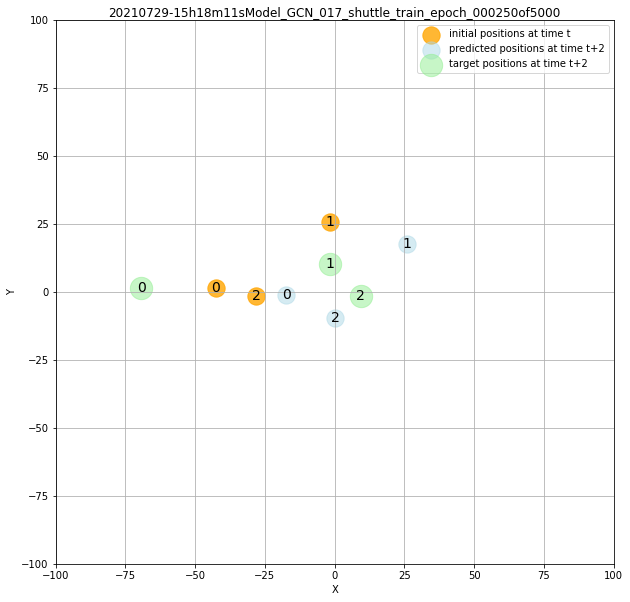

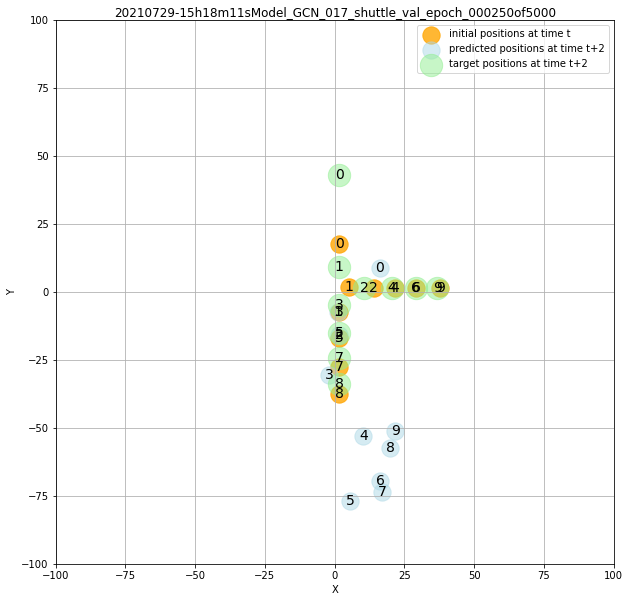

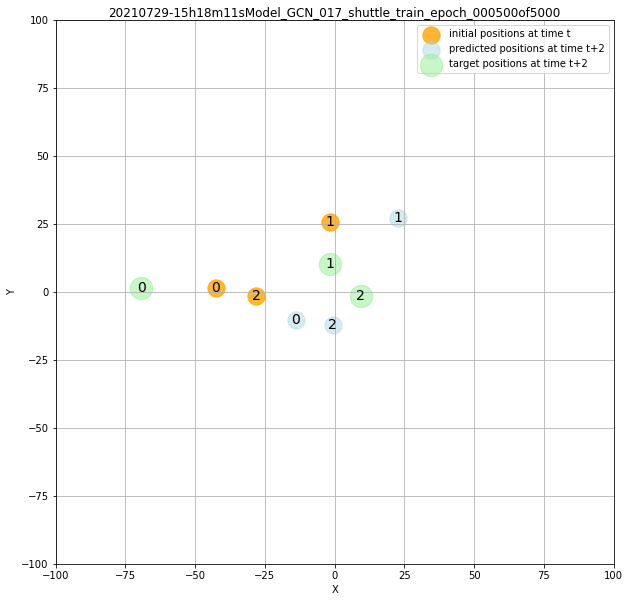

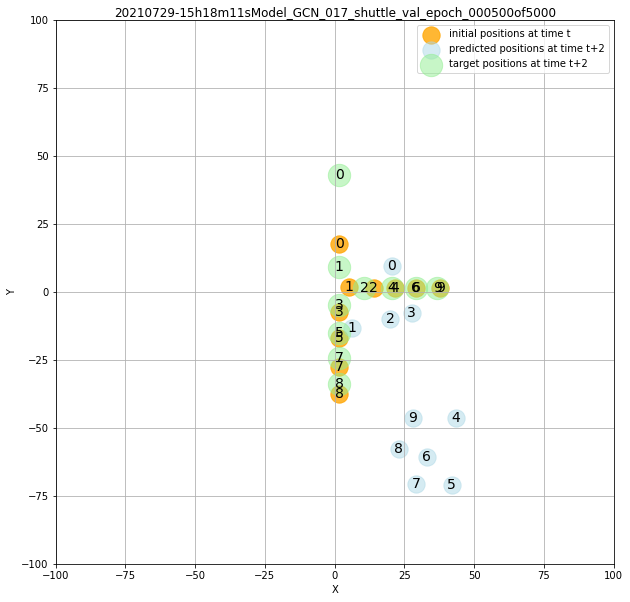

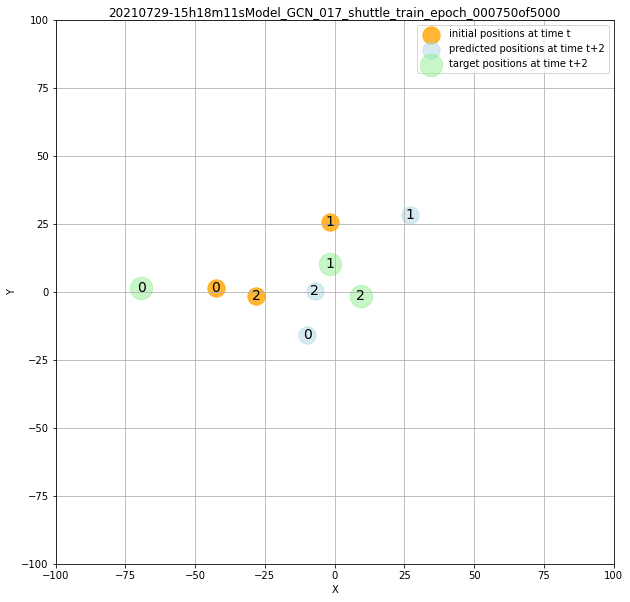

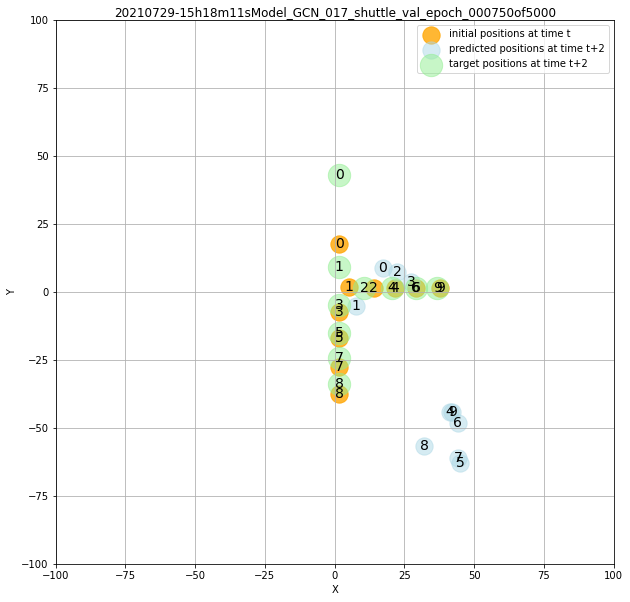

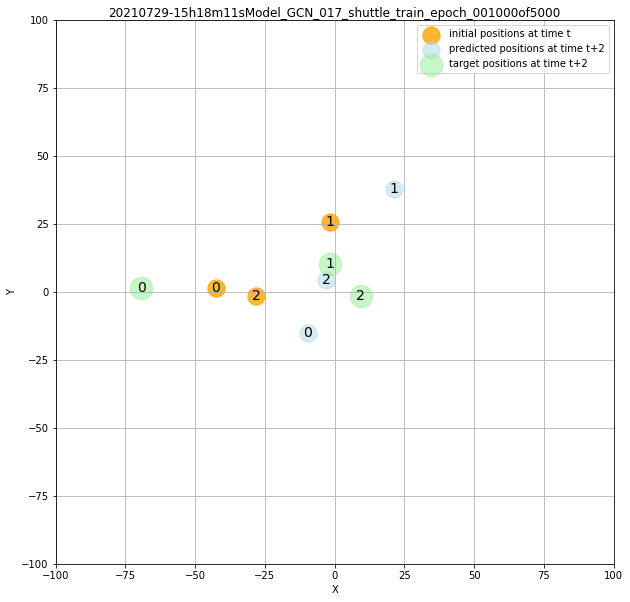

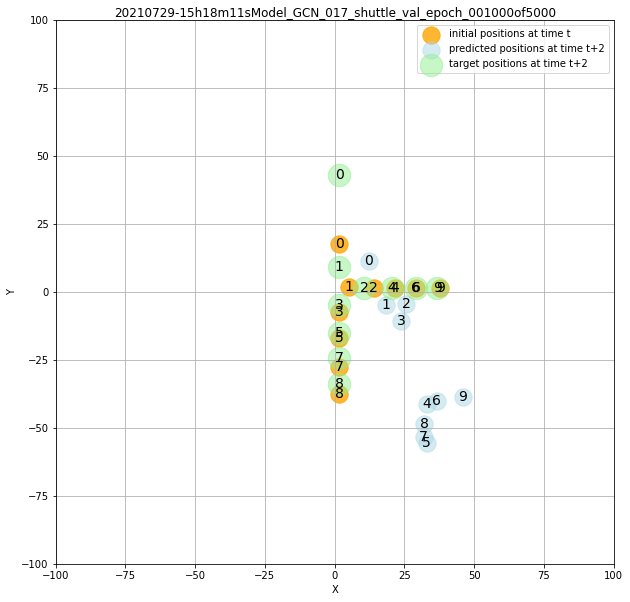

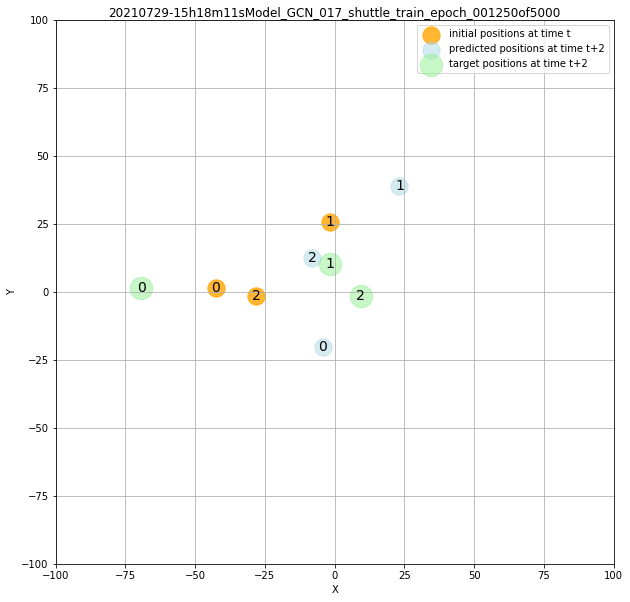

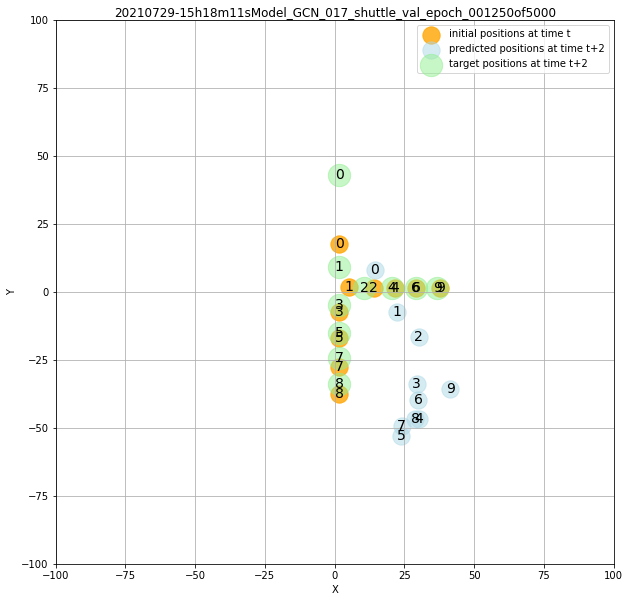

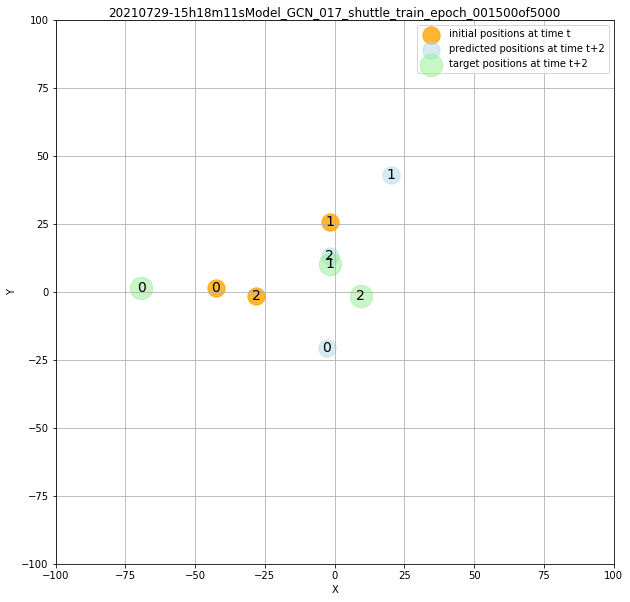

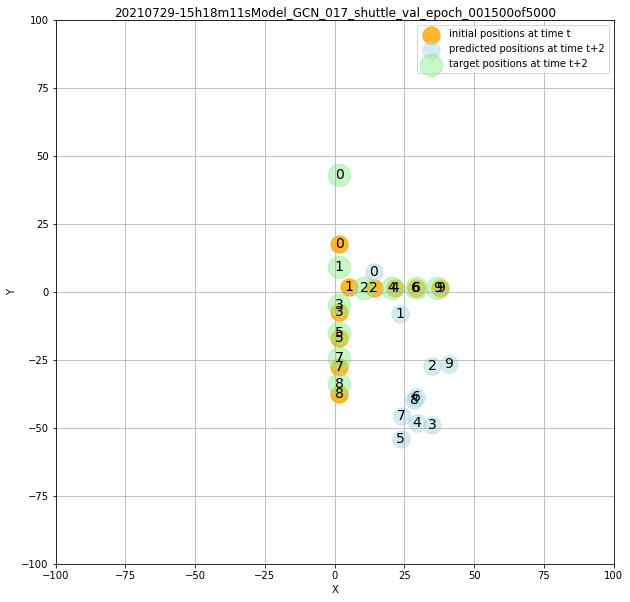

In [84]:
##================================
# Train
##================================
t_losses, v_losses, lr_r , load_paths, fig_paths = trainer.run_trainer()
print(f"> Training completed")

In [ ]:
##================================
# STORE PARAMETERS
##================================
if savestat:
    ## add information to the dict
    for k,v in load_paths.items():
        dict_text_output[k]= v
    

    ## add information to the dict
    dict_text_output['final_train_loss']= t_losses[-1]
    dict_text_output['final_val_loss']= v_losses[-1]
    dict_text_output["figure_paths"] = fig_paths

    description = f"{this_date}{ts}"
    dict_text_output_descr = f"{description}_training_parameters"
    dict_text_output_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,dict_text_output_descr)
    print (f"\n> Parameters stored in: \n{dict_text_output_path}.pkl")

    # store parameters as txt file
    TXT_OUTPUT = f'{dict_text_output_path}.txt'
    with open(TXT_OUTPUT, 'w') as filehandle:
        for k,v in dict_text_output.items():
            filehandle.write(f'{k}: {v}\n')
        filehandle.close()

    # store parameters as a pickle
    with open(f'{dict_text_output_path}.pkl', 'wb') as handle:
        pkl.dump(dict_text_output, handle, protocol=pkl.HIGHEST_PROTOCOL)  

In [ ]:
##================================
# FINAL GLIMPSE
##================================

if final_print:
    np.set_printoptions(suppress=True)
    for data in dataset_val[:1]:
        print ("--------------")
        print ("\nINPUT DATA_POS,DATA_X")
        print (np.around(data.x.detach().numpy(),2))
        print ("\nTARGET DATA_Y")
        print (data.y.detach().numpy())
        print ("\nPREDICTIONS")
        model.to('cpu')
        if edges_attr:
            print (model(data.x, data.edge_index, data.edge_attr)).detach().detach().numpy()
        else:
            print (model(data.x, data.edge_index).detach().detach().numpy())

In [ ]:
##================================
# DELETE TEMP FILES
##================================
print ("temporary files stored: ")
tempfiles = glob.glob(MODEL_OUTPUT_PATH_TODAY+'/*TEMP_*')
if run_unattended:
    deletestat = "y"
else:
    print (*tempfiles, sep= "\n")
    print ("delete temporary files? y/n")
    deletestat = input(x)
if deletestat in list_yes:
    for i, file_path in tqdm(enumerate(tempfiles)):
        try:
            os.remove(file_path)
        except OSError as e:
            print("Error: %s : %s" % (file_path, e.strerror))
    print ("temporary files deleted")
else:
    print ("temporary files not deleted")